In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import json
import polars as pl

import evaluation as ev

pl.config.Config.set_tbl_rows(100)

polars.config.Config

In [3]:
batch_path = os.path.abspath('/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/results/batch_20241111_003353')

# Explore Results

In [4]:
results_path = os.path.join(batch_path, 'results.json')

with open(results_path, 'r') as f:
    results = json.load(f)

data = []
for file_path, result in results.items():
    true_label = ev.get_true_label(file_path)
    pred_label = result["prediction"]
    data.append({"true_label": true_label, "pred_label": pred_label})

df = pl.DataFrame(data)
df['pred_label'].value_counts()

shape: (7, 2)
┌────────────────────────────────┬───────┐
│ pred_label                     ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ FEEDING                        ┆ 36    │
│ COMMUNICATION MANAGEMENT       ┆ 485   │
│ GROOMING AND HEALTH MANAGEMENT ┆ 71    │
│ FUNCTIONAL MOBILITY            ┆ 369   │
│ HOME MANAGEMENT                ┆ 241   │
│ MEAL PREPARATION AND CLEANUP   ┆ 715   │
│ LEISURE                        ┆ 344   │
└────────────────────────────────┴───────┘

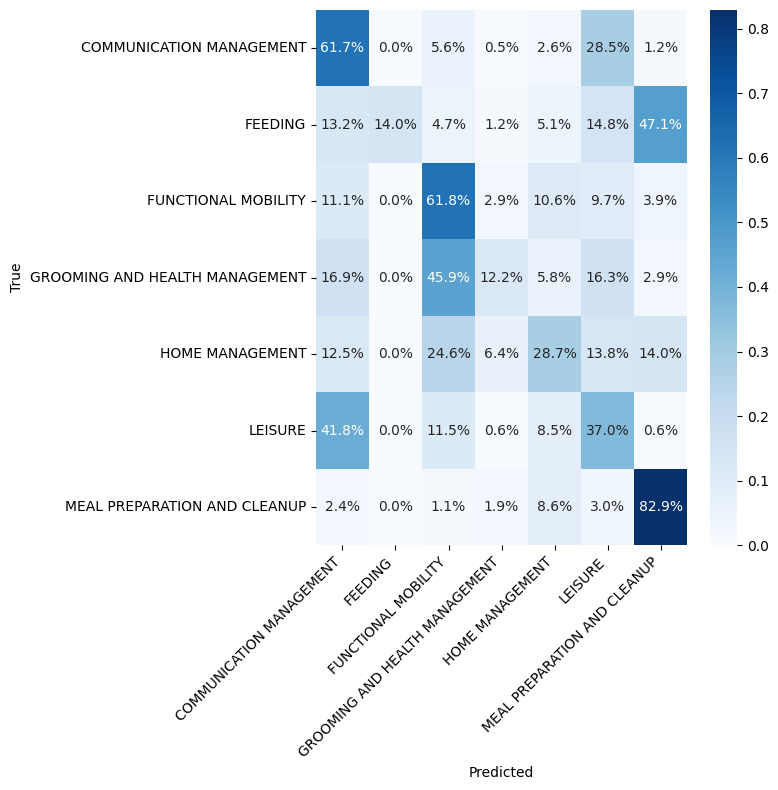

In [5]:
evaluation = ev.evaluate_adl_classifications(results_dict=results)

In [6]:
evaluation['additional_metrics']

{'Balanced Accuracy': np.float64(0.42618814560899854),
 'Macro Avg F1': 0.3894357691557112,
 'Weighted Avg F1': 0.3894357691557107}

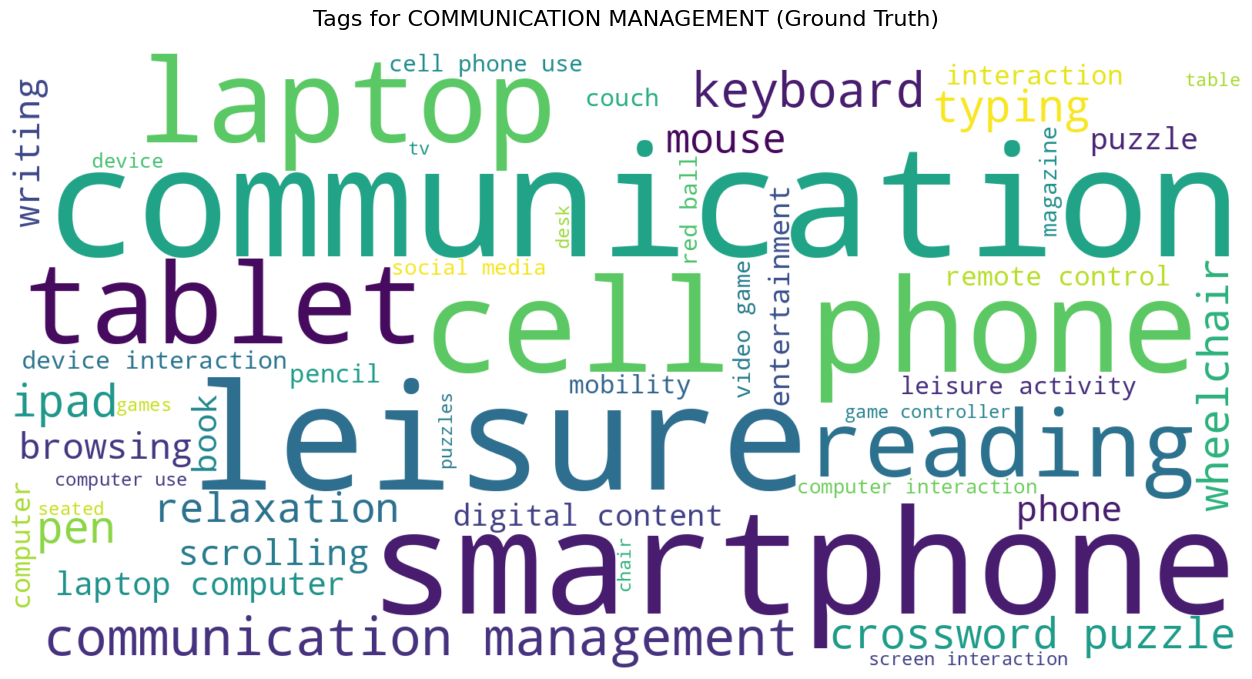

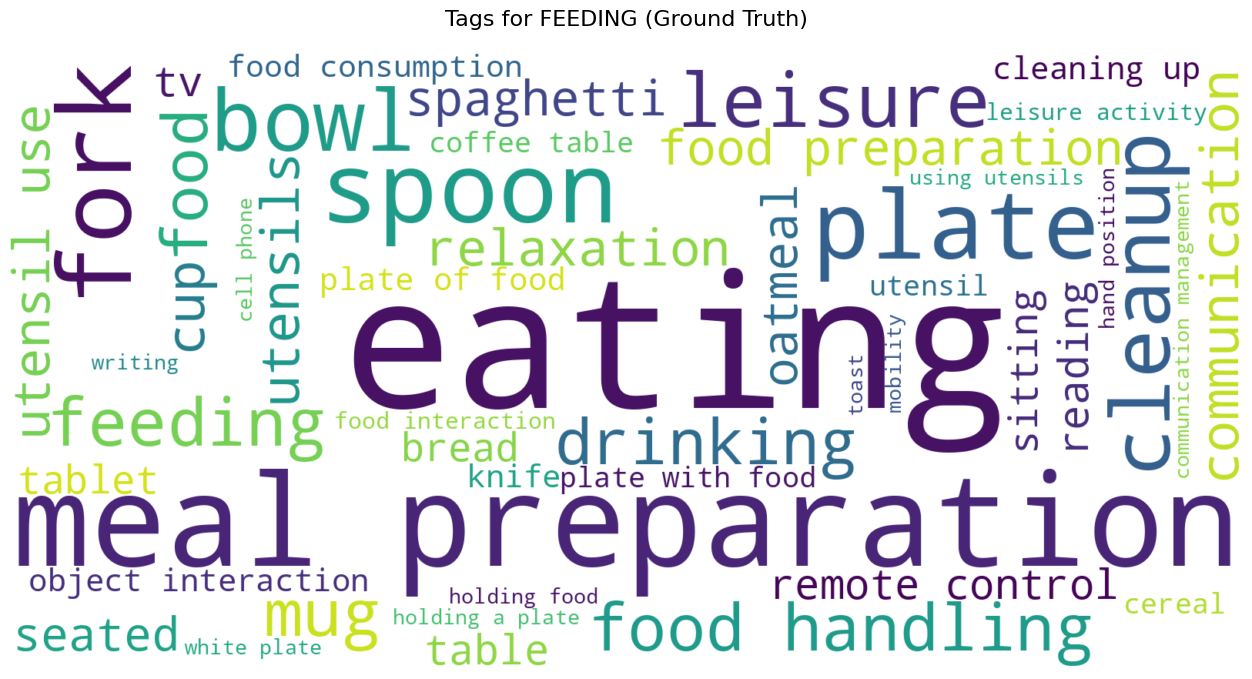

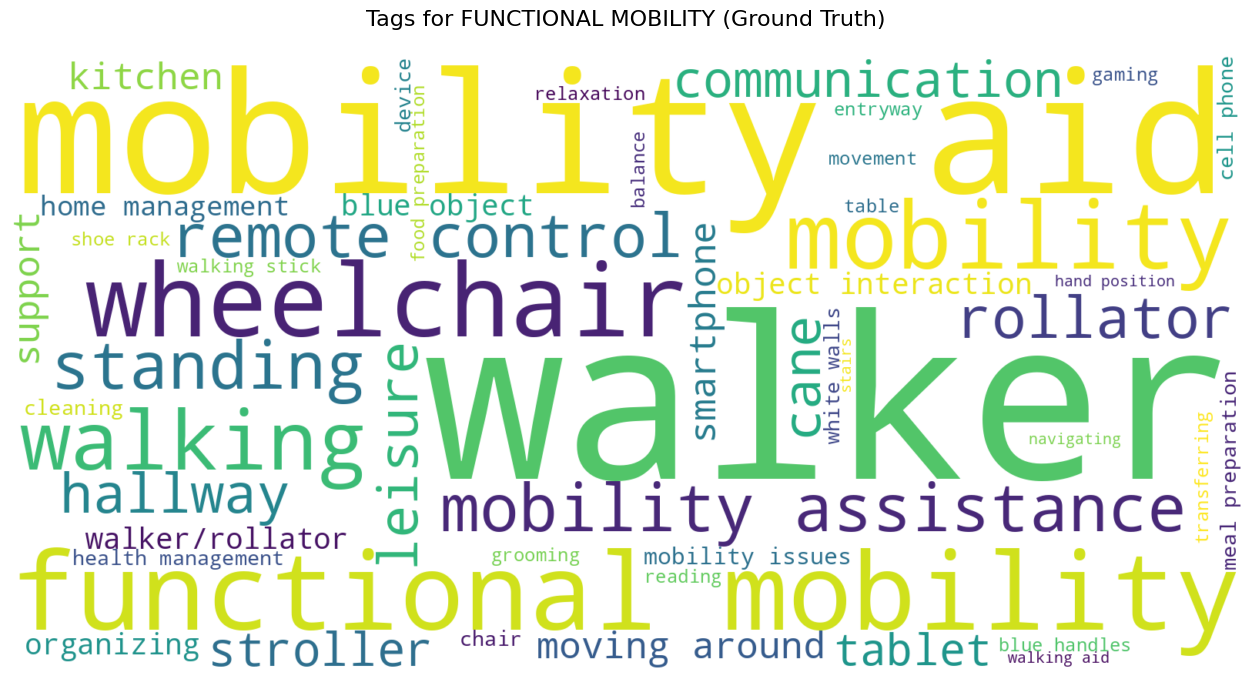

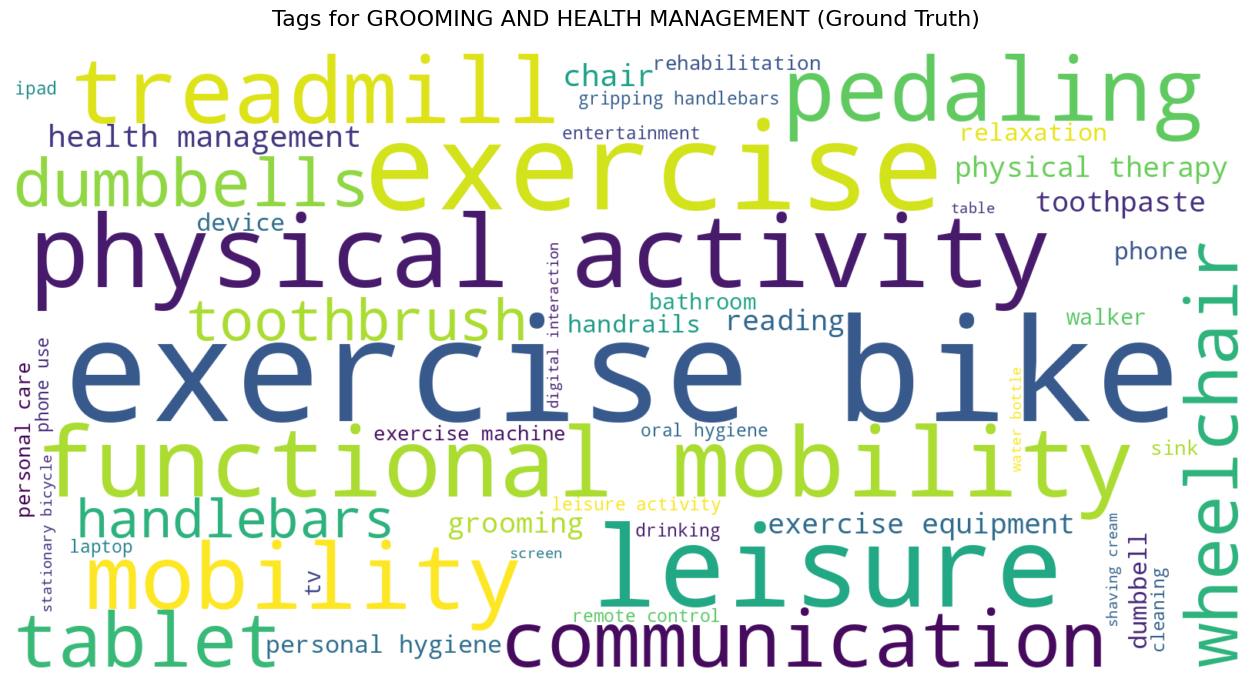

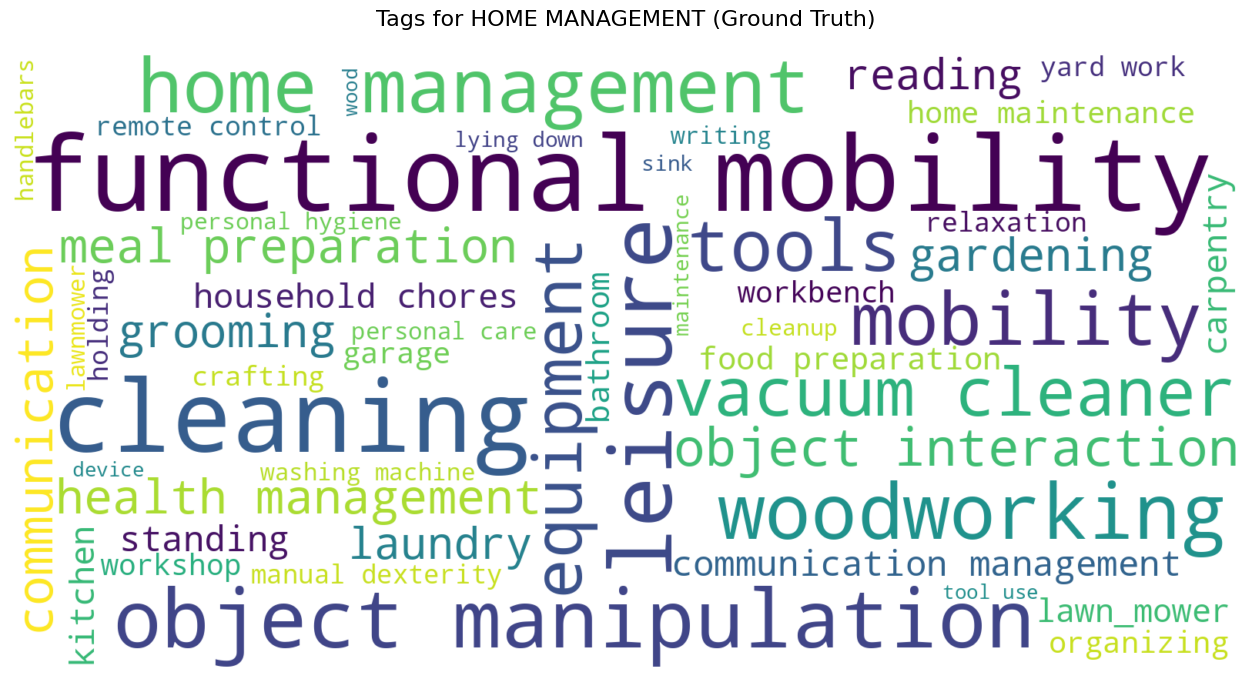

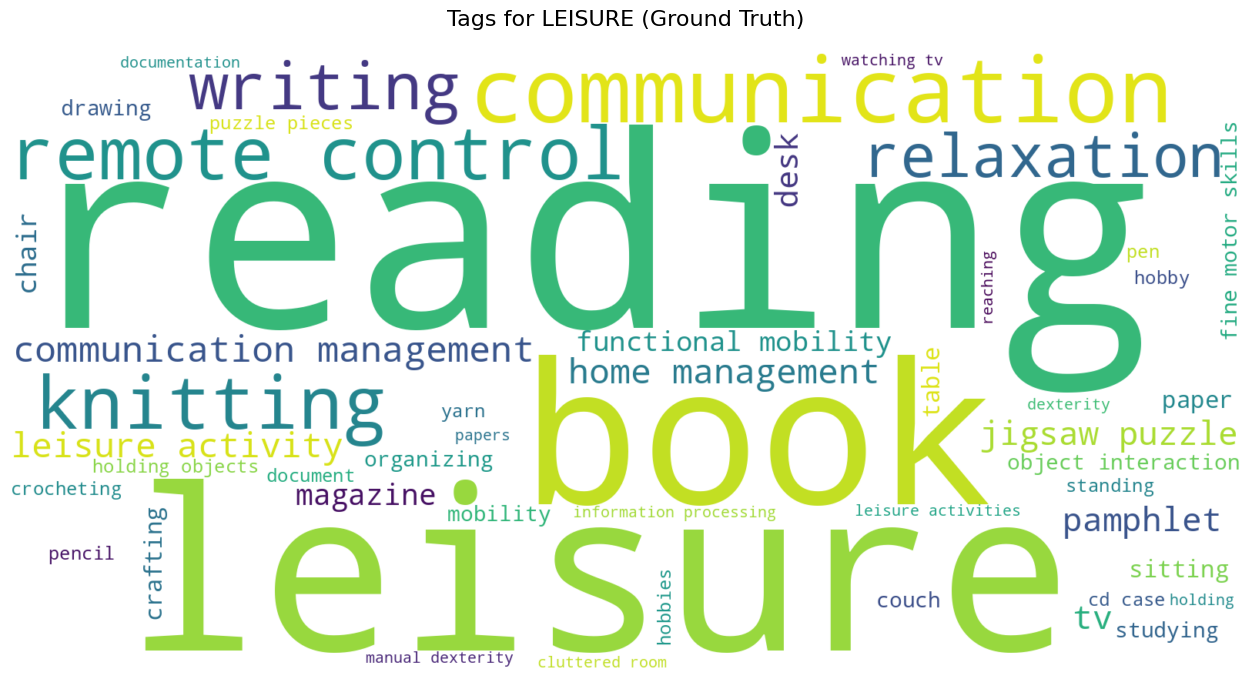

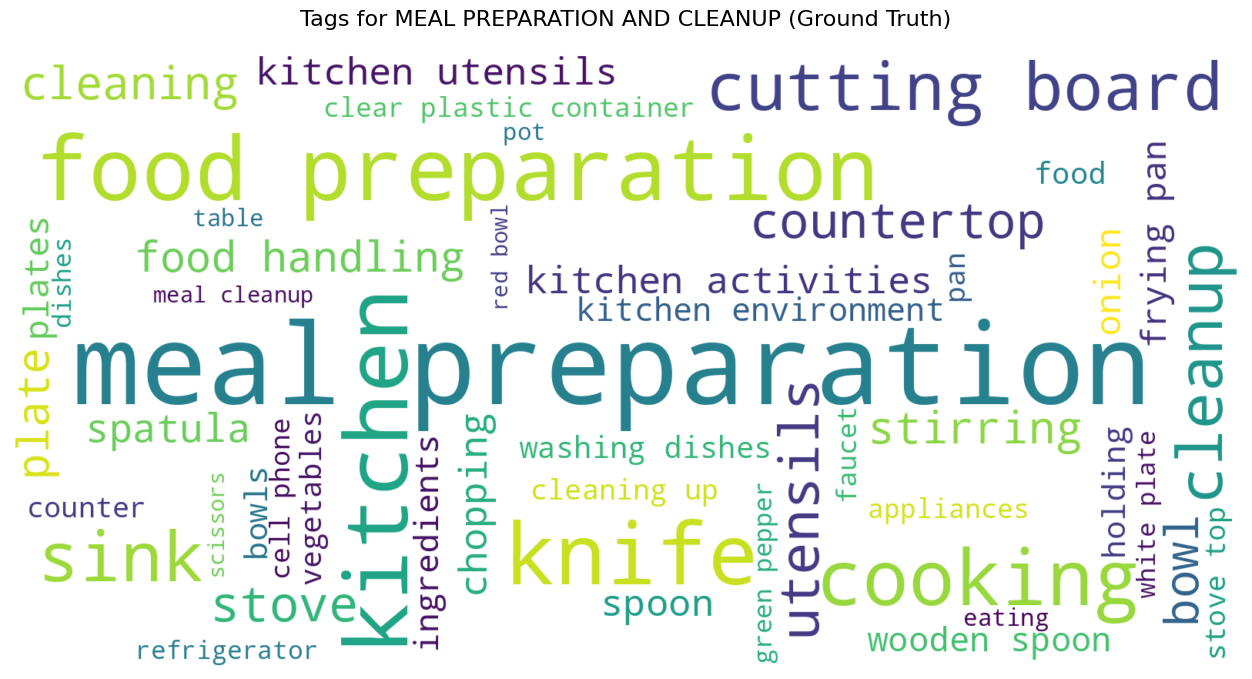

In [7]:
analysis_results_gt = ev.analyze_tags(results)

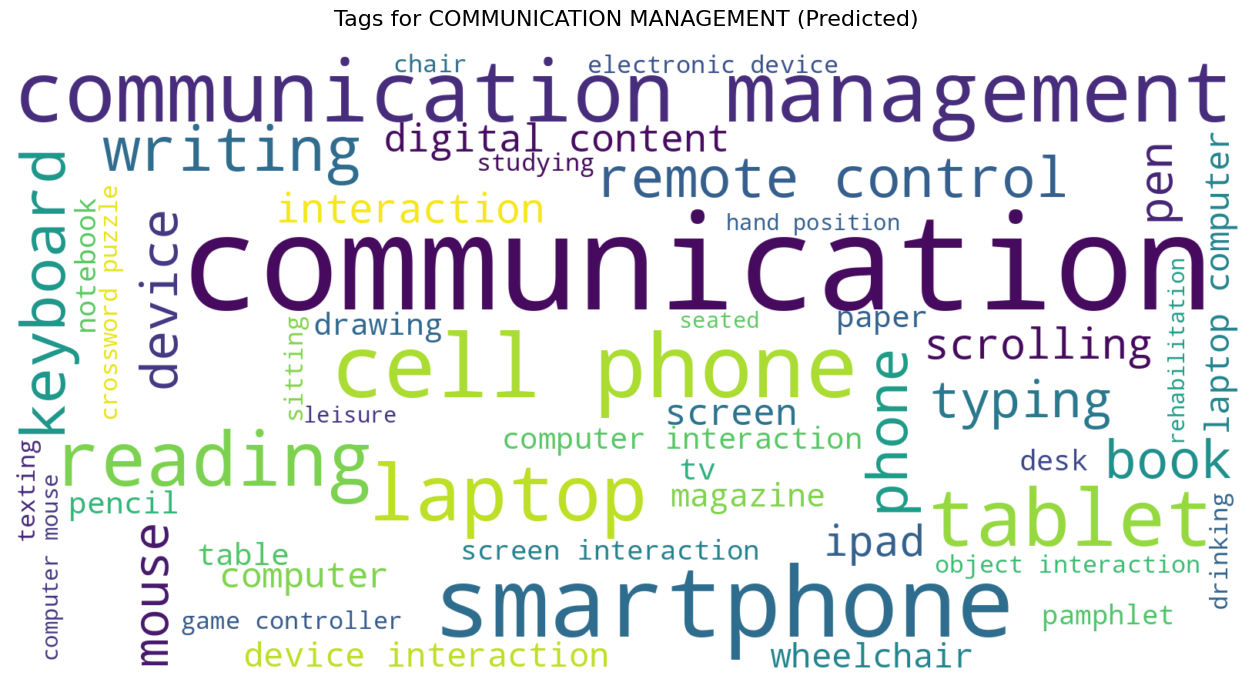

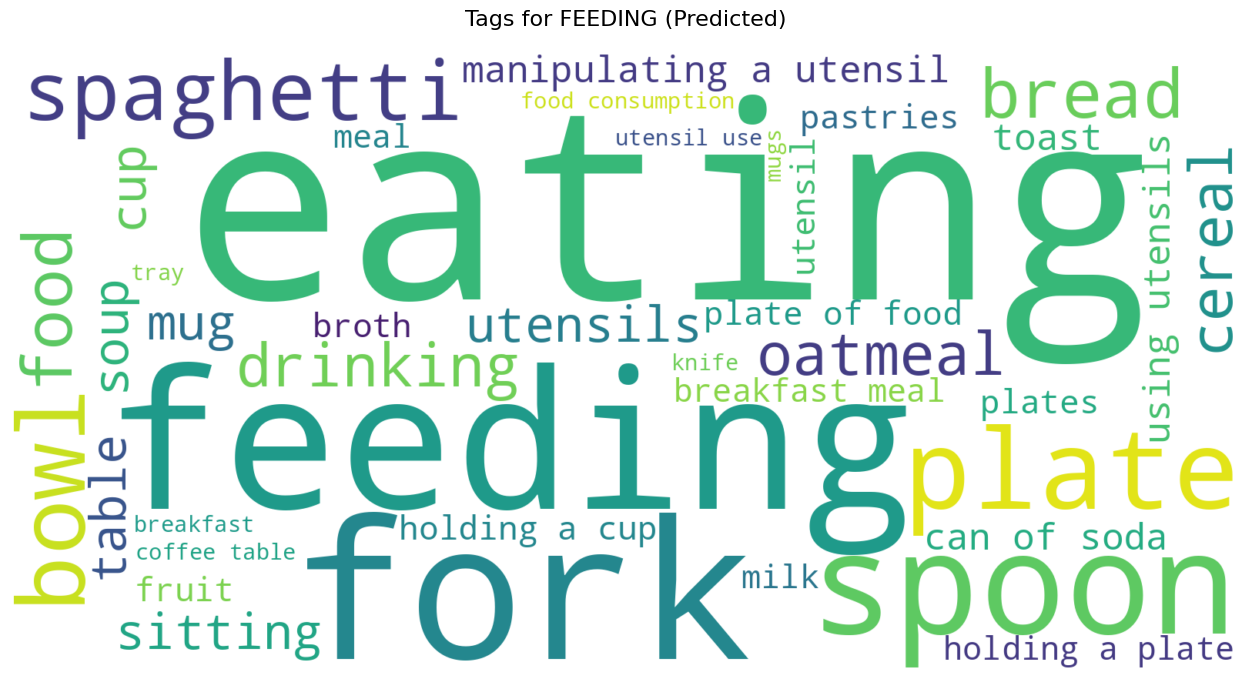

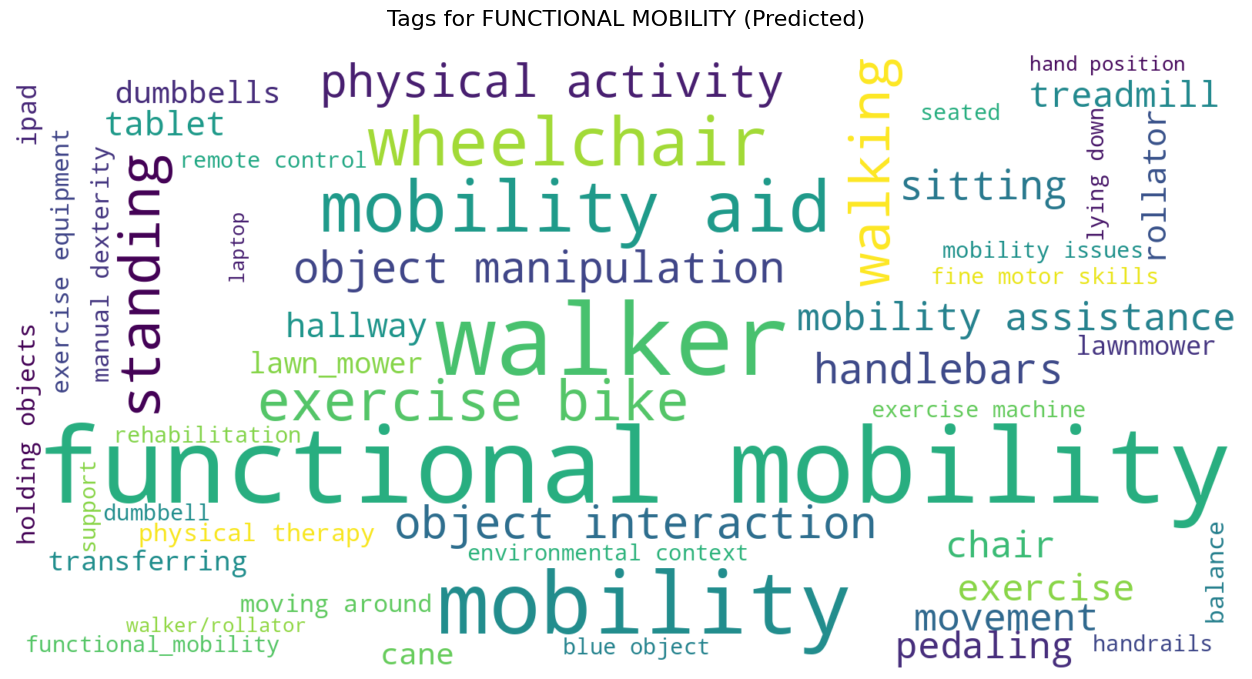

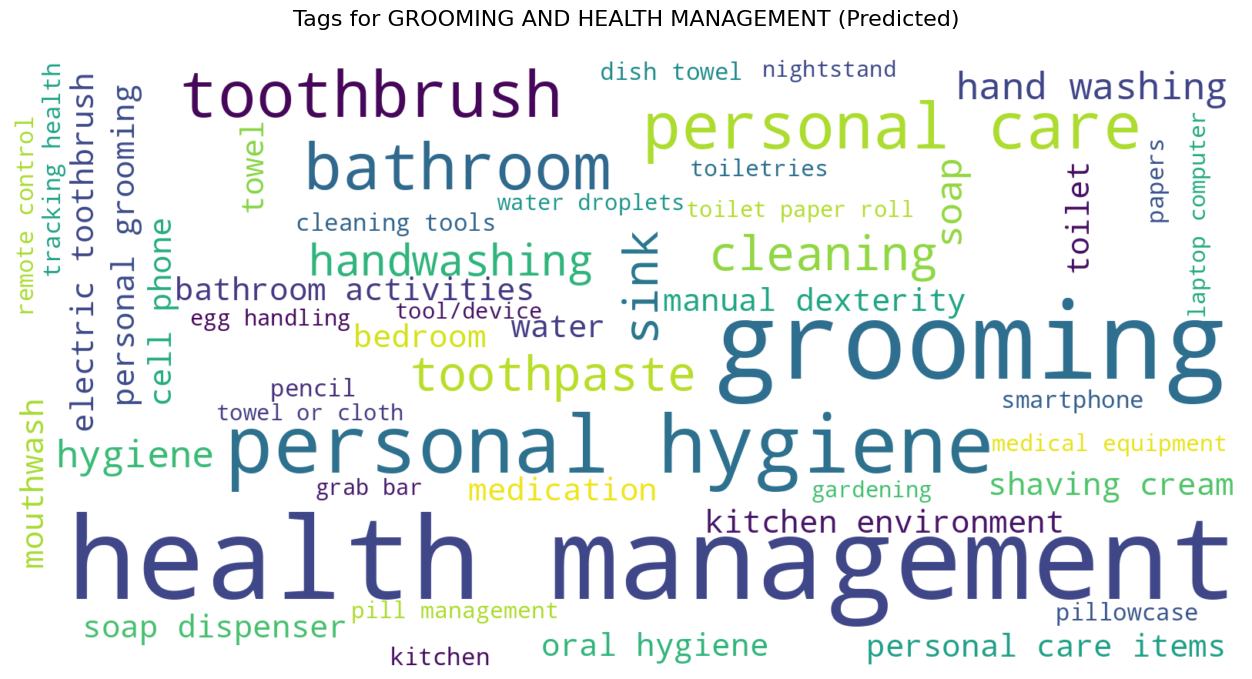

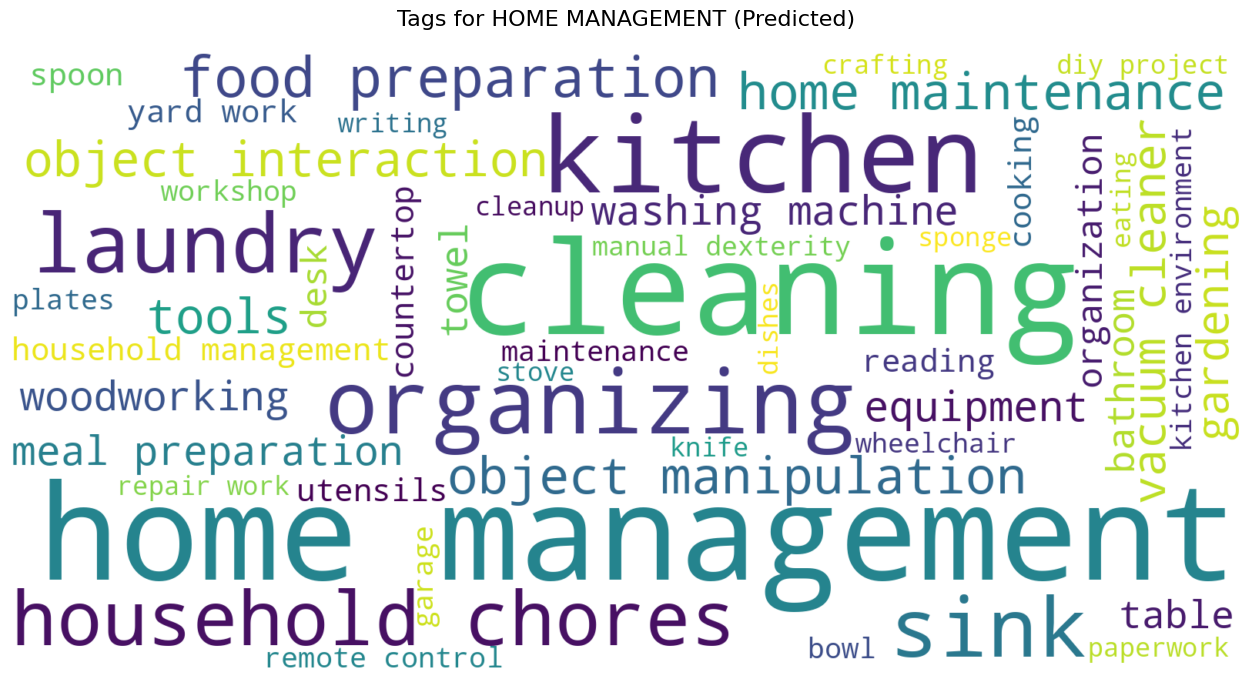

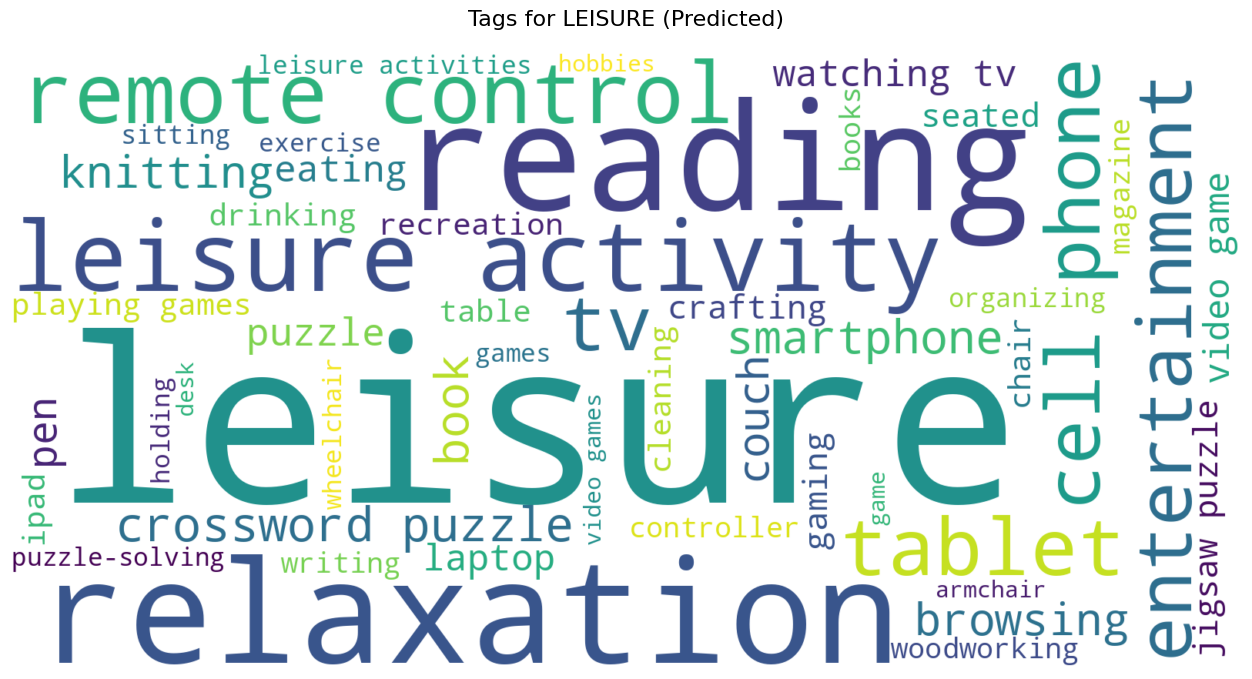

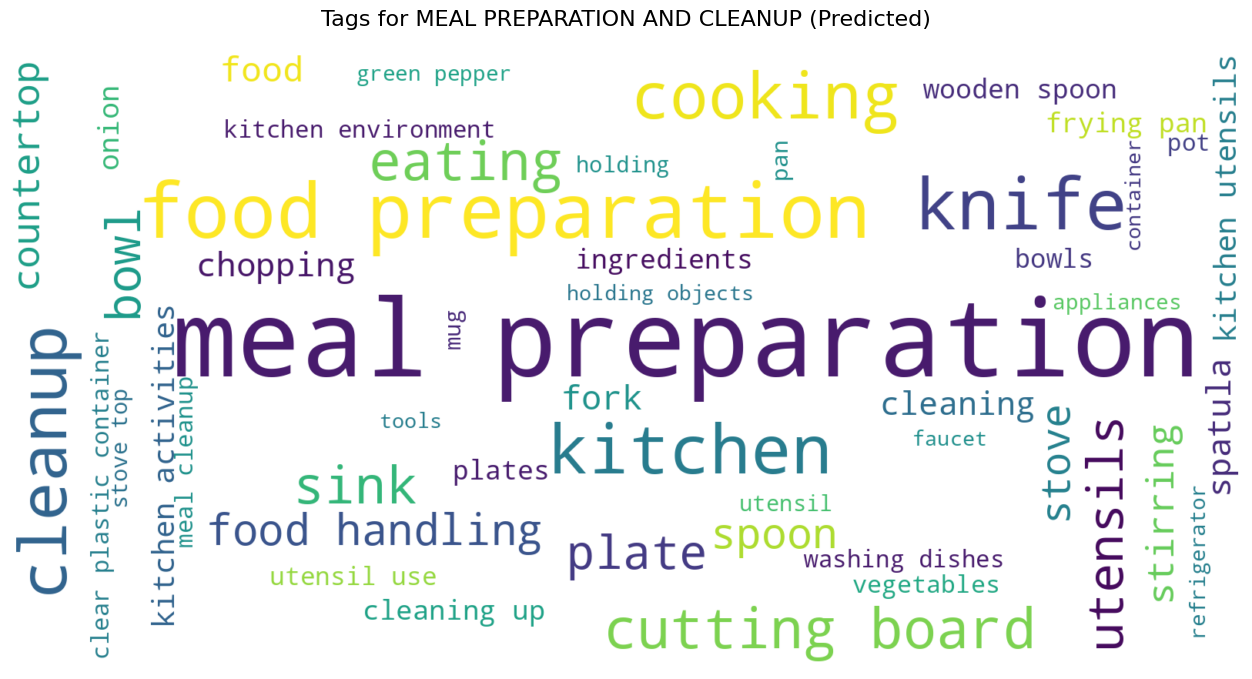

In [8]:
analysis_results_pred = ev.analyze_tags(results,use_ground_truth=False)

In [9]:
summary = ev.analyze_predictions(results)

In [10]:
# Print summary
print("\nPrediction Analysis Summary:")
for label, stats in summary.items():
    print(f"\n{label}:")
    print(f"Total samples: {stats['total_samples']}")
    print(f"Accuracy: {stats['accuracy']}%")
    if stats['misclassifications']:
        print("Misclassified as:")
        for wrong_label, count in stats['misclassifications'].items():
            print(f"  {wrong_label}: {count} times")


Prediction Analysis Summary:

COMMUNICATION MANAGEMENT:
Total samples: 428
Accuracy: 61.68%
Misclassified as:
  LEISURE: 122 times
  FUNCTIONAL MOBILITY: 24 times
  HOME MANAGEMENT: 11 times
  MEAL PREPARATION AND CLEANUP: 5 times
  GROOMING AND HEALTH MANAGEMENT: 2 times

FUNCTIONAL MOBILITY:
Total samples: 207
Accuracy: 61.84%
Misclassified as:
  COMMUNICATION MANAGEMENT: 23 times
  HOME MANAGEMENT: 22 times
  LEISURE: 20 times
  MEAL PREPARATION AND CLEANUP: 8 times
  GROOMING AND HEALTH MANAGEMENT: 6 times

GROOMING AND HEALTH MANAGEMENT:
Total samples: 172
Accuracy: 12.21%
Misclassified as:
  FUNCTIONAL MOBILITY: 79 times
  COMMUNICATION MANAGEMENT: 29 times
  LEISURE: 28 times
  HOME MANAGEMENT: 10 times
  MEAL PREPARATION AND CLEANUP: 5 times

HOME MANAGEMENT:
Total samples: 407
Accuracy: 28.75%
Misclassified as:
  FUNCTIONAL MOBILITY: 100 times
  MEAL PREPARATION AND CLEANUP: 57 times
  LEISURE: 56 times
  COMMUNICATION MANAGEMENT: 51 times
  GROOMING AND HEALTH MANAGEMENT: 26